# Build, Train, and Evaluate Neural Networks for a Binary Classification Task

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Phase 1: Data Analysis & Preparation

Data source: [Banana Quality Dataset](https://www.kaggle.com/datasets/l3llff/banana?resource=download&SSORegistrationToken=CfDJ8HYJ4SW6YXhJj8CRciRldeTyEmJk1yb2Kla806Haw8nD2fvZGj2zsVP-bilLbh1JKYBADpcCDeue5tZR0MLr5QYwx0kF-QOL8RRhaXrHfUJV_CLK9zbP3XnkF3paAMBWjvnVq__nZnX2b6ang27rYRy2wjxbedOWEEVoklXDCy47_AVnjDIbvo23Y4QJVSVpQ1KQQAJx9xHt3TcOkwvMD_0hOeaVf943ETyUrY354CM1TwWyQsZqOyV_gmdsc6Jq4bz8XQhWzoCDIYy5ZJo55fK3oOQTKS8Rw3QMAp1Kvgt3y7g3dkBqR8ZMldhvxVeq4aKONK8LCh_wV2hcMocwLoeNhYnJKA&DisplayName=Megan%20Joseph)

In [38]:
# load dataset
X = pd.read_csv("archive\\banana_quality.csv").iloc[:, :-2]
y = pd.read_csv("archive\\banana_quality.csv").iloc[:, [-1]]

In [39]:
X.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345


In [45]:
y['Quality'] = y['Quality'].map(dict(Good=1, Bad=0))
y.head()

,Quality
0,1
1,1
2,1
3,1
4,1


In [46]:
# z-score normalize 
X_norm = (X-X.mean())/X.std()
X_norm.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness
0,-0.551102,0.609691,1.974927,-0.705852,0.523918,0.782519
1,-0.778058,0.619013,0.573349,-1.201162,-0.070580,0.608455
2,0.182674,1.113229,1.200272,-1.273816,0.052097,1.092350
3,-0.056517,1.154413,1.365097,-0.609777,-0.127708,0.516440
4,0.655249,1.031888,0.383773,-0.578762,-0.340270,0.140590


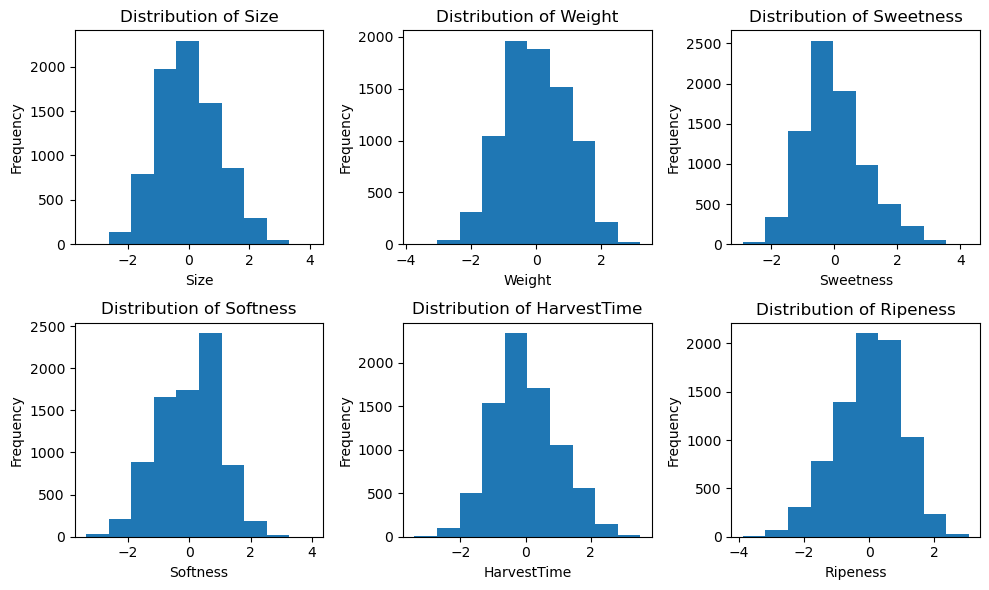

In [57]:
# visualizations
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
a = axs.ravel()
for idx,ax in enumerate(a):
    col = X_norm.columns[idx]
    ax.hist(X_norm[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [49]:
# range of values
for col in X_norm.columns:
    print(f'The mean of {col} is {round(X_norm[col].mean(), 2)}.')
    print(f'The median of {col} is {round(X_norm[col].median(), 2)}.')
    print(f'The mininimum value of {col} is {round(X_norm[col].min(), 2)}.')
    print(f'The maximum value of {col} is {round(X_norm[col].max(), 2)}.')
    print('=====================================================')

The mean of Size is 0.0.
The median of Size is -0.07.
The mininimum value of Size is -3.39.
The maximum value of Size is 4.08.
The mean of Weight is 0.0.
The median of Weight is -0.05.
The mininimum value of Weight is -3.73.
The maximum value of Weight is 3.19.
The mean of Sweetness is -0.0.
The median of Sweetness is -0.13.
The mininimum value of Sweetness is -2.91.
The maximum value of Sweetness is 4.26.
The mean of Softness is 0.0.
The median of Softness is 0.11.
The mininimum value of Softness is -3.36.
The maximum value of Softness is 4.0.
The mean of HarvestTime is 0.0.
The median of HarvestTime is -0.09.
The mininimum value of HarvestTime is -3.42.
The maximum value of HarvestTime is 3.53.
The mean of Ripeness is 0.0.
The median of Ripeness is 0.09.
The mininimum value of Ripeness is -3.88.
The maximum value of Ripeness is 3.06.


In [56]:
# checking distribution of output

perc_zero = round((len(y[y['Quality']==0]) / len(y))*100, 2)
print(f'The percentage of bad quality bananas is {perc_zero}%')
print(f'The percentage of good quality bananas is {100 - perc_zero}%')

The percentage of bad quality bananas is 49.93%
The percentage of good quality bananas is 50.07%
